In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../clean-datasets/primary.csv')

In [3]:
df.head()

,name,tagline,summary,description,year_founded,website,city,region,country,postal_code,...,keywords,investor_count,mosaic_change,funding_total_millions,last_funding_millions,funding_count,last_funding_type,last_funding_date,sentiment,articles
0,Valera Health,"Your Path to Wellness, Just a Click Away","Valera Health, based in New York, is a mental ...",Valera Health operates as a tele-mental health...,2015.0,https://valerahealth.com,Brooklyn,New York,United States,11249,...,"['Mental Health Care', 'Telemedicine', 'Health...",20,-117.0,76.32,9.12,8,Series B - II,2024-04-09,"{'sentimentScore': 100, 'cntPositive': 15, 'cn...",[{'contentId': 'ab325015a7bbae7beefc4833b73696...
1,Bestow,"Protecting Life, Simplified",Bestow is a Texas-based company that offers fa...,Bestow operates as an insurance technology com...,2017.0,https://bestow.com,Dallas,Texas,United States,75226,...,"['Insurance', 'Technology', 'Healthcare', 'Fin...",8,-119.0,138.10,70.00,5,Series C,2020-12-16,"{'sentimentScore': 90, 'cntPositive': 48, 'cnt...",[{'contentId': 'b633176d-6378-46d0-9b15-d2b611...
2,PlainID,"Secure Your Identity, Empower Your Business",PlainID is a company based in Tel Aviv that sp...,PlainID is an Identity Security Posture Manage...,2014.0,https://plainid.com,Tel Aviv,NaN,Israel,6789139,...,"['Cybersecurity', 'Identity Management', 'Data...",10,-120.0,99.00,75.00,5,Series C,2021-12-21,"{'sentimentScore': 100, 'cntPositive': 21, 'cn...",[{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...
3,Snapcart,"Innovating Connections, Empowering Insights",Snapcart is a commercial company based in Jaka...,Snapcart specializes in real-time offline shop...,2015.0,https://snapcart.global,Jakarta,NaN,Indonesia,12940,...,"['Artificial Intelligence & Machine Learning',...",9,124.0,14.70,10.00,4,Series A,2017-10-25,"{'sentimentScore': 92, 'cntPositive': 7, 'cntN...",[{'contentId': '5ffd28ae-d4f3-46e2-a3b1-526c96...
4,slice,"Experience Money, Mastered.",slice is a financial technology company based ...,Slice operates as a financial technology compa...,2016.0,https://sliceit.com,NaN,Assam,India,781028,...,"['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...",36,-76.0,390.50,7.77,21,Debt - VIII,2024-07-19,"{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...


In [4]:
import ast

#extract 'sentimentScore' from the 'sentiment' string
def extract_sentiment_score(sentiment_str):
    try:
        sentiment_dict = ast.literal_eval(sentiment_str)
        return sentiment_dict.get('sentimentScore', None)
    except (ValueError, SyntaxError):
        return None

#create a new column 'sentimentScore'
df['sentimentScore'] = df['sentiment'].apply(extract_sentiment_score)

In [5]:
#Defining numerical columns to work with
numerical_cols = [
    'year_founded',
    'investor_count',
    'mosaic_change',
    'funding_total_millions',
    'last_funding_millions',
    'funding_count',
    'sentimentScore'
]

In [6]:
#Significant outliers - dropped from the dataset
df.drop([9,3313], inplace = True)

In [7]:
#Using a StandardScaler - common good practice for K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])


In [8]:
X_scaled

array([[-0.50947838,  1.24346422, -0.92501958, ..., -0.35479021,
         0.73804362,  0.7131997 ],
       [ 0.1113885 , -0.47841181, -0.94445878, ...,  0.47999504,
        -0.1943735 , -0.22430704],
       [-0.81991182, -0.19143247, -0.95417839, ...,  0.54855494,
        -0.1943735 ,  0.7131997 ],
       ...,
       [ 0.73225538, -0.76539114, -1.48875655, ...,  0.08234766,
        -0.81598491, -3.50558062],
       [ 0.1113885 ,  0.95648488, -0.05025531, ...,  0.34287526,
        -0.81598491, -0.03680569],
       [ 0.73225538,  0.09554687, -1.51791536, ..., -0.39044136,
         0.73804362, -0.41180839]])

In [9]:
#Different k's were tested, 3 was chosen because it made the most graphical sense (after PCA) to divide clusters this way
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [10]:
#Creating a new column designating the cluster
df['cluster'] = kmeans.labels_


In [11]:
#Printing the number of values in each cluster
print(df['cluster'].value_counts())


0    2027
1    1464
4     788
6     731
2     351
3     138
5       8
Name: cluster, dtype: int64


In [12]:
#Visualizing means of values within each cluster
cluster_profiles = df.groupby('cluster')[numerical_cols].mean()
print(cluster_profiles)


         year_founded  investor_count  mosaic_change  funding_total_millions  \
cluster                                                                        
0         2018.803651        8.679329     -63.065614               41.550612   
1         2013.673497       10.136612     -57.133197               83.384392   
2         2016.233618        9.814815     -40.082621               76.100969   
3         2015.536232       17.572464     -20.362319              844.388043   
4         2018.296954        9.644670     159.175127               44.748934   
5         2014.375000       34.250000     -15.875000             5974.625000   
6         2015.232558       22.216142     -23.477428              200.380834   

         last_funding_millions  funding_count  sentimentScore  
cluster                                                        
0                    21.153675       3.682782       94.883078  
1                    30.316653       6.366120       94.648907  
2                    26

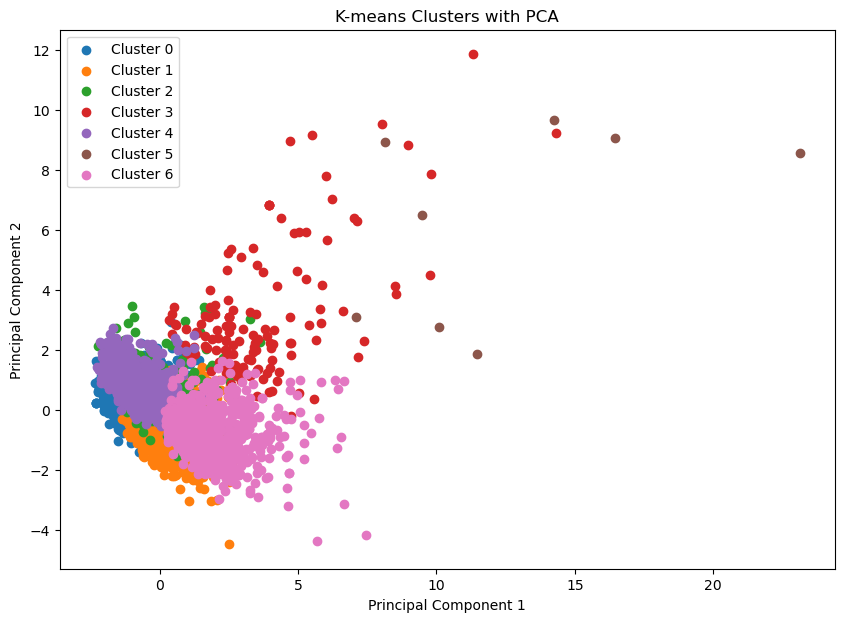

In [13]:
from sklearn.decomposition import PCA

#reduce to 2 principal components for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

#create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['cluster'] = kmeans.labels_

#plot the clusters in 2D
plt.figure(figsize=(10, 7))
for cluster in range(k):
    cluster_data = pc_df[pc_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-means Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

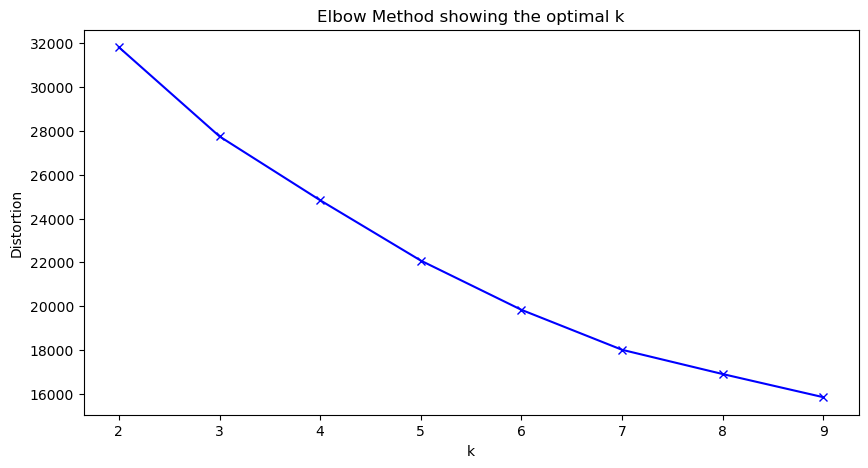

In [17]:
#calculate distortions for a range of k values for the elbow method
distortions = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_scaled)
    distortions.append(kmeans_model.inertia_)
    

#plot the elbow chart
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()

